In [32]:
from keras import models, layers
import numpy as np
from keras.utils import to_categorical
import pandas as pd
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Dense, Lambda
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools

In [3]:
train = pd.read_csv('C:/Users/sizeq/Downloads/train (4).csv')
test = pd.read_csv('C:/Users/sizeq/Downloads/test (2).csv')

In [4]:
#Prepare Data for Training

In [5]:
# Check the data
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
# scalling the value in 0-1 , so /255. 
X = train.iloc[:,1:]/255.
y = train.iloc[:,0]
test = test/255.

In [9]:
# reshaping 784 to 28,28,1
X = X.values.reshape(train.shape[0],28,28,1)
test = test.values.reshape(test.shape[0],28,28,1)

In [10]:
X.shape

(42000, 28, 28, 1)

In [11]:
# one hot of target values using keras's to_categorical class
y = to_categorical(y)

In [12]:
# splits train/test set 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size =0.3,random_state=29)

In [13]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((29400, 28, 28, 1), (29400, 10), (12600, 28, 28, 1), (12600, 10))

In [14]:
mean_px = Xtrain.mean().astype(np.float32)
std_px = Xtrain.std().astype(np.float32)

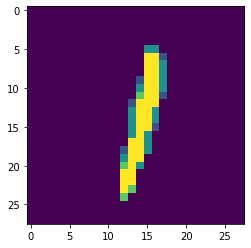

In [15]:
g = plt.imshow(Xtrain[0][:,:,0])

In [18]:
def standardize(x): 
    return (x-mean_px)/std_px

In [19]:
#Modeling and Training

In [22]:
# this is a model with dropouts layers
def cnn():
    model = models.Sequential()
    model.add(Lambda(standardize,input_shape=(28,28,1)))
    model.add(Convolution2D(32,(3,3), activation = 'relu', padding = 'Same'))
    model.add(BatchNormalization(axis=1))   
    model.add(Convolution2D(64,(3,3), activation = 'relu', padding = 'Same'))
    model.add(MaxPooling2D())
    model.add(Convolution2D(128,(3,3), activation = 'relu', padding = 'Same'))
    model.add(BatchNormalization(axis=1))
    model.add(Convolution2D(128,(2,2), activation = 'relu', padding = 'Same'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))          
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model          

In [23]:
classifier = cnn()
# traing the model with 20 epochs and 1000 batch size
classifier.fit(Xtrain, ytrain, epochs=20,batch_size=1000,validation_data=(Xtest,ytest))



Train on 29400 samples, validate on 12600 samples
Epoch 1/20
29400/29400 [==============================] - 183s 6ms/step - loss: 1.4389 - accuracy: 0.5399 - val_loss: 1.1488 - val_accuracy: 0.8533
Epoch 2/20
29400/29400 [==============================] - 196s 7ms/step - loss: 0.2973 - accuracy: 0.9070 - val_loss: 0.9756 - val_accuracy: 0.9250
Epoch 3/20
29400/29400 [==============================] - 204s 7ms/step - loss: 0.1456 - accuracy: 0.9557 - val_loss: 0.9812 - val_accuracy: 0.8916
Epoch 4/20
29400/29400 [==============================] - 181s 6ms/step - loss: 0.0976 - accuracy: 0.9721 - val_loss: 0.7374 - val_accuracy: 0.9008
Epoch 5/20
29400/29400 [==============================] - 182s 6ms/step - loss: 0.0766 - accuracy: 0.9774 - val_loss: 0.6044 - val_accuracy: 0.9122
Epoch 6/20
29400/29400 [==============================] - 184s 6ms/step - loss: 0.0616 - accuracy: 0.9812 - val_loss: 0.4918 - val_accuracy: 0.9271
Epoch 7/20
29400/29400 [==============================] - 18

In [24]:
#prediction of submission_test set
prediction = classifier.predict(test) 
predictions = np.argmax(prediction, axis=1)

In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix

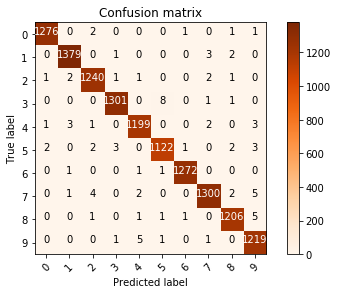

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = classifier.predict(Xtest)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(ytest,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [23]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})


In [24]:
submissions.to_csv("C:/Users/sizeq/Downloads/simple_cnn_kaggle.csv", index=False, header=True)
submissions.shape

(28000, 2)